#1

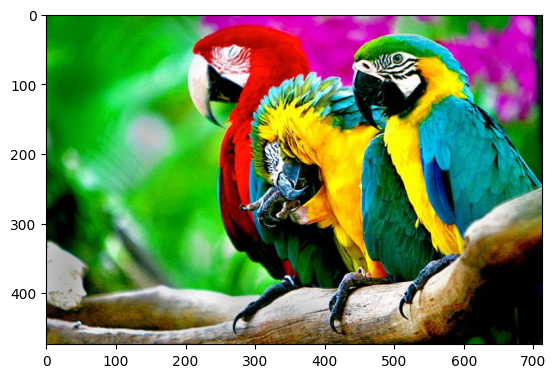

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from skimage import img_as_float
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
import skimage
image=imread('parrots.jpg')
image=skimage.img_as_float(image)
#plt.imshow(image)

#2

In [8]:
image = img_as_float(imread('parrots.jpg'))
w, h, d = image.shape
pixels = pd.DataFrame(np.reshape(image, (w*h, d)), columns=["R", "G", "B"])

#3

In [9]:
def cluster_pixels(pixels, n_clusters):
    pixels = pixels.copy()
    model = KMeans(n_clusters=n_clusters, init="k-means++", random_state=241)
    pixels["cluster"] = model.fit_predict(pixels)
    return pixels

def mean_median_image(pixels: pd.DataFrame):
    means = pixels.groupby("cluster").mean().values
    mean_pixels = np.array([means[c] for c in pixels["cluster"]])
    mean_image = np.reshape(mean_pixels, (w, h, d))
    medians = pixels.groupby("cluster").median().values
    median_pixels = np.array([medians[c] for c in pixels["cluster"]])
    median_image = np.reshape(median_pixels, (w, h, d))
    return mean_image, median_image

#4

In [10]:
def psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return 10.0 * np.log10(1.0 / mse)

#5

In [11]:
psnr_mean = 0
for n in range(1, 21):
    cpixels = cluster_pixels(pixels, n)
    mean_image, median_image = mean_median_image(cpixels)
    psnr_mean, psnr_median = psnr(image, mean_image), psnr(image, median_image)
    if psnr_mean > 20 or psnr_median > 20:
        print(n)
        break

C:\Users\Василий\PycharmProjects\pythonProject2\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Василий\PycharmProjects\pythonProject2\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Василий\PycharmProjects\pythonProject2\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Василий\PycharmProjects\pythonProject2\venv\lib\site-packages\sklearn\cluster\_kme

11
